# Séries temporais com *Pycaret*

Aplicação do novo módulo da biblioteca *Pycaret* para modelagem e previsões de séries temporais. Em um projeto anterior foi usado o módulo de regressão dessa mesma biblioteca, onde nas configurações (*setup*) da geração dos modelos foi inserido *fold_strategy*=*'timeseries'*. Porém mesmo com essa modificação de parâmetros, o módulo não é muito adequado para séries temporais. Com esse novo módulo, foram inseridos os modelos de baseline (*snaive* e *naive*), os convencionais para séries temporais (Suavização exponencial, ARIMA, ETS e AutoARIMA), modelos mais elaborados (*Prophet*, *BATS*, *TBATS* e *Tetha*) e modelos que utilizam modelos clássicos de *machine learning*.


## Instalação da biblioteca com o módulo de séries temporais

In [1]:
pip install pycaret-ts-alpha

     |████████████████████████████████| 430kB 8.2MB/s 
     |████████████████████████████████| 256kB 41.2MB/s 
     |████████████████████████████████| 6.8MB 36.7MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 14.4MB 208kB/s 
     |████████████████████████████████| 1.5MB 36.4MB/s 
     |████████████████████████████████| 1.7MB 28.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.7MB 27.0MB/s 
     |████████████████████████████████| 174kB 56.5MB/s 
     |████████████████████████████████| 276kB 22.6MB/s 
     |████████████████████████████████| 1.4MB 36.4MB/s 
     |████████████████████████████████| 2.0MB 37.1MB/s 
     |████████████████████████████████| 112kB 50.4MB/s

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from pprint import pprint
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

## Importação dos dados

Os dados usados nesse modelo são do *site* *FRED* e tratam de vendas no setor de varejo. A frequência é mensal, a escala dos dados está em milhoes de dólares e vão do ano de 1992 até 2020. Os dados podem ser obtidos [aqui](https://www.kaggle.com/robikscube/hourly-energy-consumption).

In [4]:
vendas= pd.read_csv("MRTSSM7225USN.csv", index_col='DATE')

#esse comando é importante, pois, caso contrário, o setup não irá conseguir aceitá-los.
vendas.index = pd.date_range('1992-01-01', periods=337, freq='M')

## Breve análise dos dados

Primeiras observações dos dados.

In [5]:
vendas.head()

,MRTSSM7225USN
1992-01-31,13325
1992-02-29,13474
1992-03-31,14346
1992-04-30,14065
1992-05-31,15077


Últimas observações dos dados.

In [6]:
vendas.tail()

,MRTSSM7225USN
2019-09-30,53944
2019-10-31,55762
2019-11-30,54039
2019-12-31,57086
2020-01-31,53411


Tipo dos dados da série temporal.

In [7]:
vendas.dtypes
#inteiros

MRTSSM7225USN    int64
dtype: object

Informações sobre a base de dados.

In [8]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 1992-01-31 to 2020-01-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MRTSSM7225USN  337 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


Dimensão da base de dados: 337 observações.

In [9]:
vendas.shape

(337, 1)

Tabela estatística da série temporal.

In [10]:
vendas.describe()

,MRTSSM7225USN
count,337.000000
mean,30624.605341
std,12124.449416
min,13325.000000
25%,20153.000000
50%,29239.000000
75%,38926.000000
max,59318.000000


Gráfico da série mostra a tendência de crescimento global da série e a presença de sazonalidade.

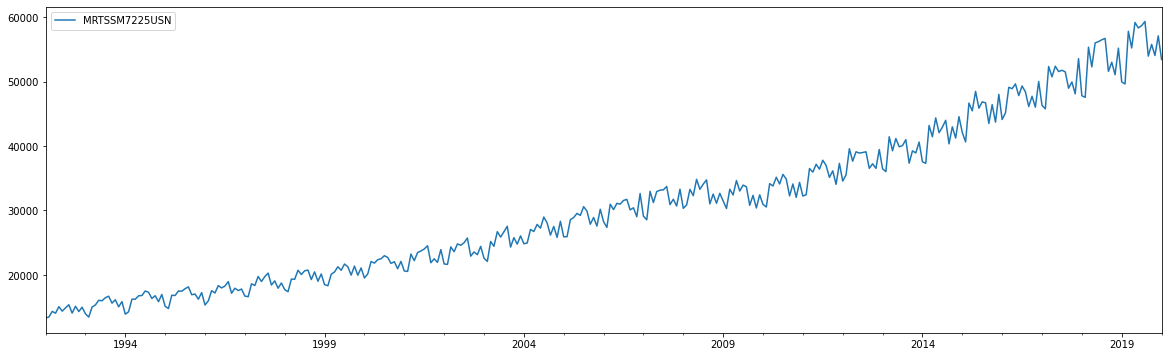

In [11]:
vendas.plot(figsize=(20,6));

## Aplicando *Auto Time Series*

Agora será aplicado a modelagem, onde será inserida a série completa e o número de observações que servirão como dados de validação. Esses dados de validação serão comparados com as previsões geradas pelos modelos.

In [13]:
exp = TimeSeriesExperiment()
exp.setup(vendas, fh=66, fold=3, session_id=42);

,Description,Value
0,session_id,42
1,Original Data,"(337, 1)"
2,Missing Values,False
3,Transformed Train Set,"(271,)"
4,Transformed Test Set,"(66,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


Modelos disponíveis nessa biblioteca.

In [14]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


Nessa etapa serão gerados todos os modelos disponíveis (desde que aplique *turbo*=*false*) e as principais métricas de avaliação de modelos. Os melhores 3 modelos serão inseridos dentro de uma variável.

Conforme abaixo, os melhores modelos são o TBATS, o Prophet e o ETS. 

In [15]:
melhores_modelos_3 = exp.compare_models(exclude=['auto_arima'], n_select=3, turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
tbats,TBATS,881.884,1.22026e+06,0.0286,0.0286,0.86,36.4100
prophet,Prophet,1143.19,2.11264e+06,0.037,0.0374,0.7411,0.4200
ets,ETS,1294.62,2.58726e+06,0.0425,0.0437,0.6539,0.0933
exp_smooth,Exponential Smoothing,1337.67,2.64925e+06,0.0441,0.0453,0.637,0.1233
arima,ARIMA,1407.88,3.07755e+06,0.0464,0.0478,0.5885,0.1033
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1551.04,3.88237e+06,0.0517,0.0536,0.4622,4.5367
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1723.36,4.65445e+06,0.0565,0.0586,0.3692,0.0600
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1723.36,4.65445e+06,0.0565,0.0586,0.3692,0.0567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,1756.85,4.62358e+06,0.0566,0.0586,0.4204,0.1167
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,1723.36,4.65445e+06,0.0565,0.0586,0.3692,0.0600


Os três melhores modelos.

In [16]:
melhores_modelos_3

[TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
       n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
       use_box_cox=True, use_damped_trend=None, use_trend=None),
 ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                      alpha=0.05, changepoint_prior_scale=0.05,
                      changepoint_range=0.8, changepoints=None,
                      daily_seasonality='auto', freq=None, growth='linear',
                      holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                      n_changepoints=25, seasonality_mode='additive',
                      seasonality_prior_scale=10.0, stan_backend=None,
                      uncertainty_samples=1000, verbose=0,
                      weekly_seasonality='auto', yearly_seasonality='auto'),
 AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=F

## Avaliando os modelos separadamente

Modelo *TBATS*.

In [17]:
modelo = exp.create_model("tbats")
modelo

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01,352.9370,1.913364e+05,0.0157,0.0159,0.9549
1,2003-07,1037.9995,1.473582e+06,0.0345,0.0353,0.7970
2,2009-01,1254.7160,1.995862e+06,0.0356,0.0348,0.8282
Mean,NaN,881.8842,1.220260e+06,0.0286,0.0286,0.8600
SD,NaN,384.3439,7.581587e+05,0.0091,0.0090,0.0683


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)

Modelo *Prophet*.

In [18]:
modelo1 = exp.create_model('prophet')
modelo1

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01-31,412.1655,3.037496e+05,0.0178,0.0180,0.9283
1,2003-07-31,1679.7248,3.586011e+06,0.0546,0.0565,0.5059
2,2009-01-31,1337.6803,2.448161e+06,0.0385,0.0376,0.7892
Mean,NaT,1143.1902,2.112641e+06,0.0370,0.0374,0.7411
SD,NaT,535.4415,1.360818e+06,0.0150,0.0157,0.1758


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')

Modelo *ETS*.

In [19]:
modelo2 = exp.create_model('ets')
modelo2

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01,672.4453,7.233810e+05,0.0290,0.0297,0.8293
1,2003-07,2036.4706,5.059261e+06,0.0667,0.0694,0.3029
2,2009-01,1174.9314,1.979129e+06,0.0318,0.0320,0.8296
Mean,NaN,1294.6158,2.587257e+06,0.0425,0.0437,0.6539
SD,NaN,563.2551,1.821598e+06,0.0171,0.0182,0.2482


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')

Definindo as variáveis de treino e de teste (ou validação).

In [20]:
y_treino = exp.get_config("y_train")
y_teste = exp.get_config("y_test")

## Gerando as previsões

### Gerando as previsões do modelo *TBATS*

In [21]:
y_predito = exp.predict_model(modelo)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,3117.8709,3416.706,0.0608,0.0629,0.504


Plotando as previsões, a série de validação e os dados de treino.

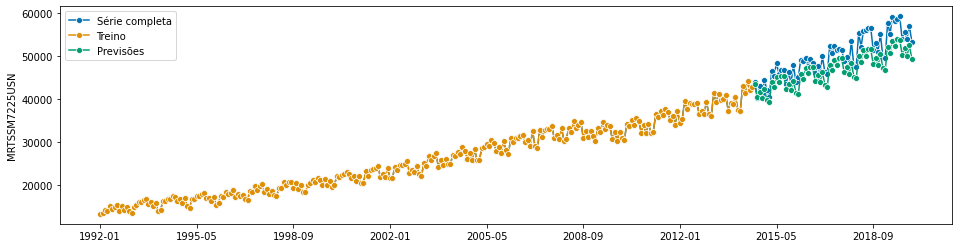

In [22]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

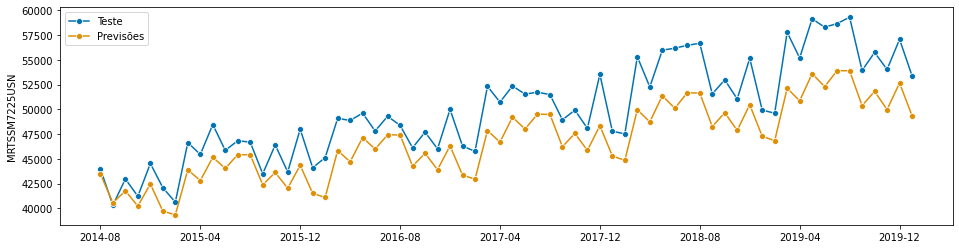

In [23]:
plot_series(y_teste, y_predito, labels=['Teste', 'Previsões']);

### Gerando as previsões para o *Prophet*

In [24]:
y_predito1 = exp.predict_model(modelo1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Prophet,3284.9683,3767.4108,0.0632,0.0657,0.3969


Plotando as previsões, a série de validação e os dados de treino.

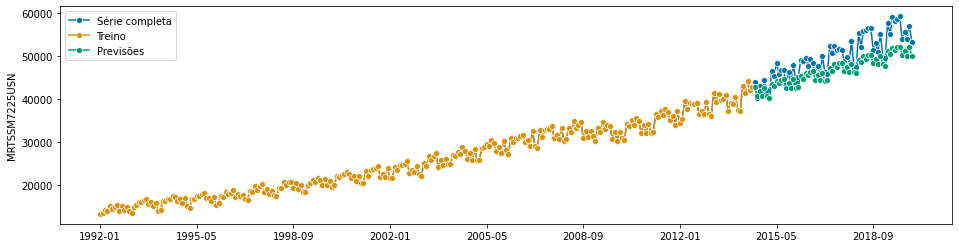

In [25]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito1, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

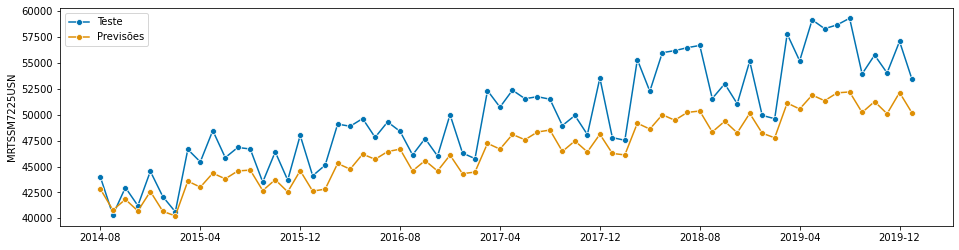

In [26]:
plot_series(y_teste, y_predito1, labels=['Teste', 'Previsões']);

### Gerando as previsões para o modelo *ETS*

In [27]:
y_predito2 = exp.predict_model(modelo2)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,3555.8322,4040.6821,0.0685,0.0715,0.3063


Plotando as previsões, a série de validação e os dados de treino.

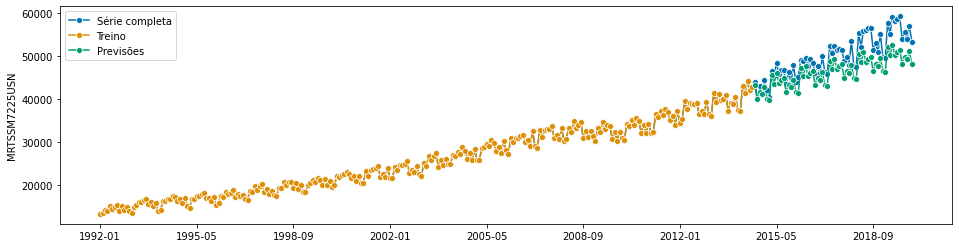

In [28]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito2, labels=['Série completa', 'Treino', 'Previsões']);

Plotando os dados de validação e as previsões.

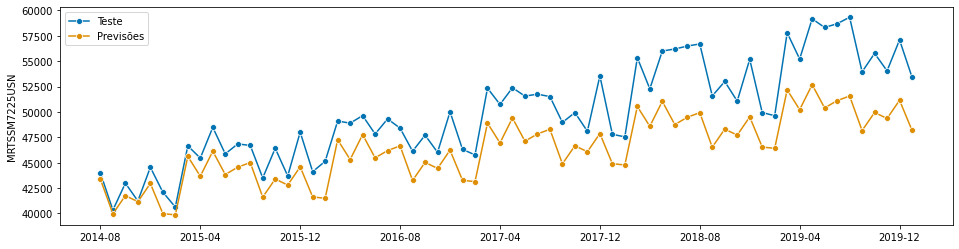

In [29]:
plot_series(y_teste, y_predito2, labels=['Teste', 'Previsões']);

## Realizando o *Tunning* do modelo

Nessa etapa é possível realizar uma busca de parâmetros que possam melhorar o desempenho dos modelos.



### *Tunning TBATS*

Em comparação com o modelo anterior, não houve melhoras significativas.

In [30]:
modelo_tunado = exp.tune_model(modelo)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01,352.3415,1.907691e+05,0.0157,0.0158,0.9550
1,2003-07,1036.6755,1.470366e+06,0.0344,0.0352,0.7974
2,2009-01,1254.7751,1.996003e+06,0.0356,0.0348,0.8281
Mean,NaN,881.2640,1.219046e+06,0.0286,0.0286,0.8602
SD,NaN,384.4573,7.581068e+05,0.0091,0.0090,0.0682


Comparando o modelo antes e depois do *tunning*, observa-se que as mudanças que ocorreram foram nos parâmetros *use_damped_trend* e *use_trend*, que antes eram *None* e depois *True*.

In [31]:
print(modelo)
print(modelo_tunado)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)
TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=True, use_trend=True)


### *Tunning Prophet*

Em relação ao *Prophet* anterior as métricas de avaliação do modelo tunado foram melhores.

In [32]:
modelo_tunado1 = exp.tune_model(modelo1)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01-31,361.1104,2.024128e+05,0.0164,0.0163,0.9522
1,2003-07-31,1773.8589,3.852118e+06,0.0582,0.0603,0.4692
2,2009-01-31,1170.2978,1.931561e+06,0.0334,0.0327,0.8337
Mean,NaT,1101.7557,1.995364e+06,0.0360,0.0364,0.7517
SD,NaT,578.7850,1.490669e+06,0.0172,0.0182,0.2055


Comparando os modelos vemos que o *tunning* trouxe parâmetros bem diferentes do *Prophet* anterior.

In [33]:
print(modelo1)
print(modelo_tunado1)

ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')
ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.2176624112345368,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.6358358856676251,
                

Paraa esse novo *Prophet* serão geradas novas previsões.

In [34]:
y_predito_tunado1 = exp.predict_model(modelo_tunado1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Prophet,2986.293,3287.2435,0.0581,0.0601,0.5409


Série com os valores de treino, validação e previsões.

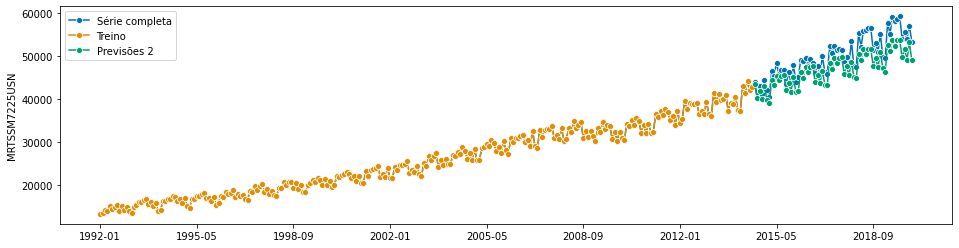

In [35]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito_tunado1, labels=['Série completa', 'Treino', 'Previsões 2']);

Previsões e dados de validação (valores reais).

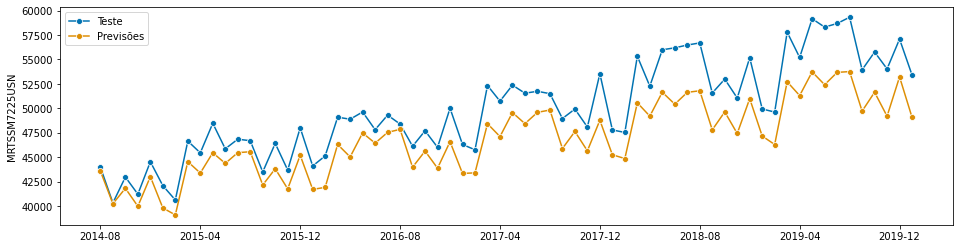

In [36]:
plot_series(y_teste, y_predito_tunado1, labels=['Teste', 'Previsões']);

Comparando os dados de validação com as previsões do modelo *Prophet* original e o tunado, vê-se que os valores do modelo tunado estão mais próximos que dos valores originais.

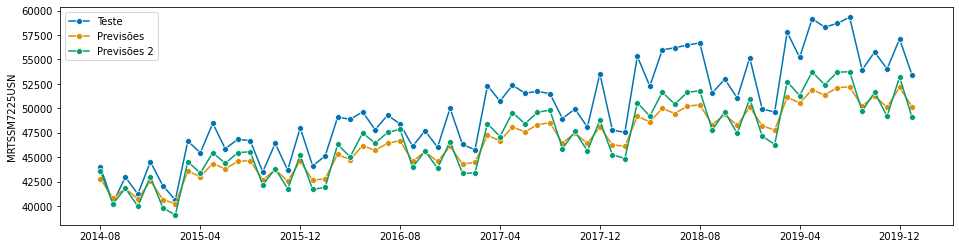

In [37]:
plot_series(y_teste, y_predito1,y_predito_tunado1, labels=['Teste', 'Previsões','Previsões 2']);

### *Tunning* ETS

Os resultados foram os mesmo do modelo original.

In [38]:
modelo_tunado2 = exp.tune_model(modelo2)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01,672.4453,7.233810e+05,0.0290,0.0297,0.8293
1,2003-07,2036.4706,5.059261e+06,0.0667,0.0694,0.3029
2,2009-01,1174.9314,1.979129e+06,0.0318,0.0320,0.8296
Mean,NaN,1294.6158,2.587257e+06,0.0425,0.0437,0.6539
SD,NaN,563.2551,1.821598e+06,0.0171,0.0182,0.2482


Os parâmetros são os mesmos.

In [39]:
print(modelo2)
print(modelo_tunado2)

AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend='add')


## Combinando modelos

Caso um modelo individualmente não seja satisfatório, pe possível realizar a combinação de modelos. Conforme abaixo, serão combinados o primeiro melhor modelo e o segundo melhor (*TBATS* e *Prophet*).

In [40]:
modelo_blend = exp.blend_models(melhores_modelos_3[0:2])


,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1998-01,362.8821,2.205278e+05,0.0158,0.0160,0.9480
1,2003-07,1350.9778,2.330659e+06,0.0443,0.0455,0.6789
2,2009-01,1257.3604,2.097944e+06,0.0361,0.0353,0.8194
Mean,NaN,990.4068,1.549710e+06,0.0321,0.0323,0.8154
SD,NaN,445.3698,9.446633e+05,0.0120,0.0122,0.1099


Gerando as previsões do modelo combinado, os resultados das métricas ficaram abaixo do modelo *Prophet* tunado.

In [41]:
y_predito_blend = exp.predict_model(modelo_blend)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,3201.4196,3573.0028,0.062,0.0643,0.4576


Renomeando a coluna que contém as previsões.

In [42]:
y_predito_blend.columns=['blend']

Plotando os dados de treino, validação e previsões.

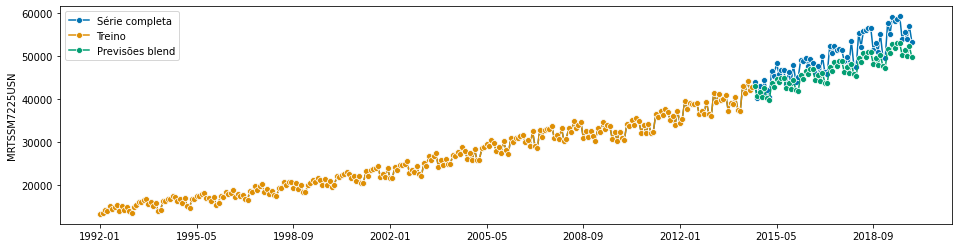

In [43]:
plot_series(vendas['MRTSSM7225USN'], y_treino, y_predito_blend['blend'], labels=['Série completa', 'Treino', 'Previsões blend']);

Validação e previsões.

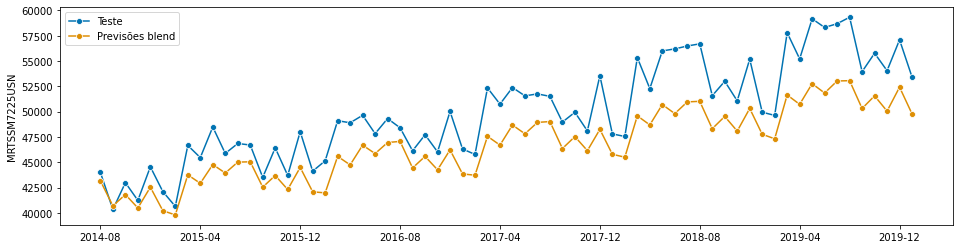

In [44]:
plot_series(y_teste, y_predito_blend['blend'], labels=['Teste', 'Previsões blend']);

## Finalizando o modelo

Como o melhor modelo foi o *Prophet* tunado, então esse projeto será finalizado com esse modelo.

In [45]:
modelo_final = exp.finalize_model(modelo_tunado1)

Gerando as previsões para um período de tempo desconhecido.

In [47]:
previsoes = exp.predict_model(modelo_final, verbose=False)

Plotando os dados de originais e as previsões.

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f039aa438d0>)

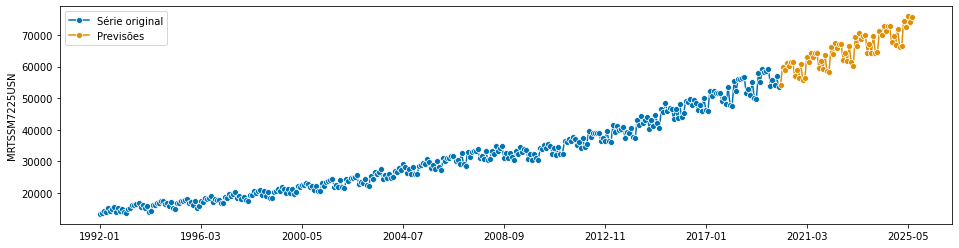

In [49]:
plot_series(vendas['MRTSSM7225USN'], previsoes, labels=['Série original','Previsões']);

## Salvando o modelo

In [50]:
exp.save_model(modelo_final, 'melhor_modelo', model_only=True)

Transformation Pipeline and Model Successfully Saved


(ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                      alpha=0.05, changepoint_prior_scale=0.2176624112345368,
                      changepoint_range=0.8, changepoints=None,
                      daily_seasonality='auto', freq=None, growth='linear',
                      holidays=None, holidays_prior_scale=0.6358358856676251,
                      mcmc_samples=0, n_changepoints=25,
                      seasonality_mode='multiplicative',
                      seasonality_prior_scale=0.8967376801947962,
                      stan_backend=None, uncertainty_samples=1000, verbose=0,
                      weekly_seasonality='auto', yearly_seasonality='auto'),
 'melhor_modelo.pkl')

## Carregando o modelo

Agora pode-se carregar o modelo e usá-lo quando necessitar. O objeto é salvo na extensão pkl, que é um módulo *Python* que permite que objetos sejam serializados em arquivos em disco e desergados de volta ao programa no tempo de execução.

In [51]:
modelo_carregado = exp.load_model('melhor_modelo')

Transformation Pipeline and Model Successfully Loaded


## Conclusão

Mais um projeto utilizando a biblioteca *Pycaret* e mostrando a sua facilidade e praticidade na modelagem de dados. Não foi necessário utilizar muitas linhas de comando e nem calcular as métricas de avaliação (feitas automaticamente).